In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## **Reading data and preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
unlabeled_df = pd.read_csv('drive/MyDrive/ML_Project_Sem5/Final_Submission/Dataset_Final.csv')

In [ ]:
df1 = unlabeled_df[unlabeled_df['Genre'] == 'happy']
df2 = unlabeled_df[unlabeled_df['Genre'] == 'sad']
df3 = unlabeled_df[unlabeled_df['Genre'] == 'rock']
df4 = unlabeled_df[unlabeled_df['Genre'] == 'edm']
df5 = unlabeled_df[unlabeled_df['Genre'] == 'death-metal']

unlabeled_df = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [ ]:
genre = unlabeled_df.Genre

In [ ]:
unlabeled_df.sort_index(axis=1, inplace = True)
dataset = unlabeled_df.copy()
unlabeled_df.drop(['Album Name','Artist Name','Genre','Key','Mode','Popularity','Release Date','Sno','Song Duration','Song ID','Song Name','Time Signature'], axis=1, inplace = True)

In [ ]:
scaler = MinMaxScaler()
features2 = scaler.fit_transform(unlabeled_df)
unlabeled_df = pd.DataFrame(features2, columns = ['Acousticness', 'Dancebility', 'Energy', 'Instrumentalness','Liveliness', 'Loudness', 'Speechiness', 'Tempo', 'Valence'])

In [ ]:
unlabeled_df['Genre'] = np.array(genre)
df1 = unlabeled_df[unlabeled_df['Genre'] == 'happy']
df2 = unlabeled_df[unlabeled_df['Genre'] == 'sad']
base = pd.concat([df1,df2],axis=0)

In [ ]:
only_2_x = base.drop(['Genre'],axis=1)
only_2_y = base.Genre

In [ ]:
genre = unlabeled_df.Genre
unlabeled_df.drop(['Genre'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(only_2_x, only_2_y, test_size=0.2, random_state=42)

PCA for visulaization

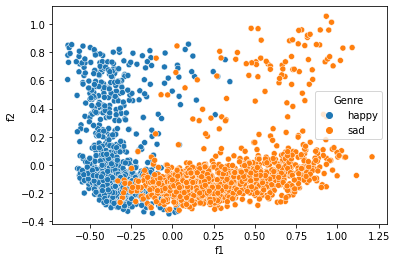

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(only_2_x)
temp = pd.DataFrame(reduced_data, columns=['f1','f2'])
temp['Genre'] = np.array(only_2_y)
sns.scatterplot(x="f1", y="f2", hue='Genre', data=temp)

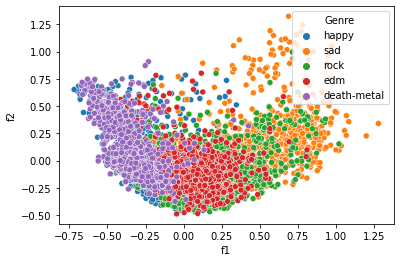

In [ ]:
unlabeled_df.drop(['Genre'], axis=1, inplace=True)
reduced_data = PCA(n_components=2).fit_transform(unlabeled_df)
temp2 = pd.DataFrame(reduced_data, columns=['f1','f2'])
temp2['Genre'] = np.array(genre)
sns.scatterplot(x="f1", y="f2", hue='Genre', data=temp2)

# CLASSIFICATION Models

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [95.25] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9737    0.9296    0.9512       199
         sad     0.9333    0.9751    0.9538       201

    accuracy                         0.9525       400
   macro avg     0.9535    0.9524    0.9525       400
weighted avg     0.9534    0.9525    0.9525       400



In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [92.75] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.8972    0.9648    0.9298       199
         sad     0.9624    0.8905    0.9251       201

    accuracy                         0.9275       400
   macro avg     0.9298    0.9277    0.9274       400
weighted avg     0.9299    0.9275    0.9274       400



In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train)

y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [95.] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9838    0.9146    0.9479       199
         sad     0.9209    0.9851    0.9519       201

    accuracy                         0.9500       400
   macro avg     0.9524    0.9498    0.9499       400
weighted avg     0.9522    0.9500    0.9499       400



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [94.75] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9588    0.9347    0.9466       199
         sad     0.9369    0.9602    0.9484       201

    accuracy                         0.9475       400
   macro avg     0.9478    0.9474    0.9475       400
weighted avg     0.9478    0.9475    0.9475       400



In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [94.] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9487    0.9296    0.9391       199
         sad     0.9317    0.9502    0.9409       201

    accuracy                         0.9400       400
   macro avg     0.9402    0.9399    0.9400       400
weighted avg     0.9402    0.9400    0.9400       400



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [95.25] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9787    0.9246    0.9509       199
         sad     0.9292    0.9801    0.9540       201

    accuracy                         0.9525       400
   macro avg     0.9540    0.9524    0.9524       400
weighted avg     0.9539    0.9525    0.9525       400



In [ ]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, y_train)

y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [95.25] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9787    0.9246    0.9509       199
         sad     0.9292    0.9801    0.9540       201

    accuracy                         0.9525       400
   macro avg     0.9540    0.9524    0.9524       400
weighted avg     0.9539    0.9525    0.9525       400



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=600).fit(X_train, y_train)

y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")

accuracy:  [95.25] %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9737    0.9296    0.9512       199
         sad     0.9333    0.9751    0.9538       201

    accuracy                         0.9525       400
   macro avg     0.9535    0.9524    0.9525       400
weighted avg     0.9534    0.9525    0.9525       400



------------------------------------------

#Extra

using best 2 models svc and mlp

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=1500).fit(only_2_x, only_2_y)
y_pred = clf.predict(only_2_x)
misclasified = np.sum(y_pred != only_2_y)
acc =  1 - misclasified/y_pred.shape
print("accuracy: ", acc*100, "%")

mood_unlabel = clf.predict(unlabeled_df)

accuracy:  [96.05] %


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


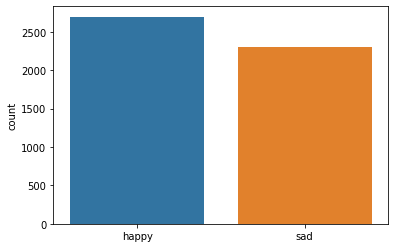

In [ ]:
sns.countplot(mood_unlabel)

In [ ]:
probs = clf.predict_proba(unlabeled_df)
probs

array([[9.96719205e-01, 3.28079513e-03],
       [9.99934551e-01, 6.54487260e-05],
       [9.99982224e-01, 1.77756412e-05],
       ...,
       [9.99996434e-01, 3.56563551e-06],
       [9.34797001e-01, 6.52029993e-02],
       [7.00798552e-01, 2.99201448e-01]])

In [ ]:
song_emotion_score = probs[:,0]
print(song_emotion_score)

[0.9967192  0.99993455 0.99998222 ... 0.99999643 0.934797   0.70079855]


Range 0-1 max min for how happy a song is

In [ ]:
print(min(song_emotion_score))
print(max(song_emotion_score))

1.2144410130865424e-06
0.9999988300194832


PCA for visualization

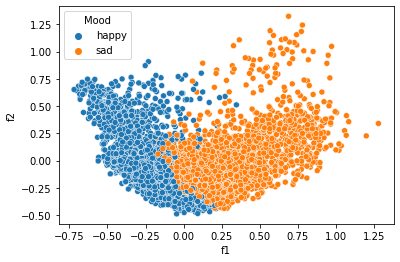

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(unlabeled_df)
temp = pd.DataFrame(reduced_data, columns=['f1','f2'])
temp['Mood'] = np.array(mood_unlabel)

fig, ax = plt.subplots()

sns.scatterplot(x="f1", y="f2",  data=temp, hue = temp['Mood'])
plt.show()

SVM

In [ ]:
from sklearn.svm import SVC

clf = SVC(probability=True).fit(only_2_x, only_2_y)

y_pred = clf.predict(only_2_x)

misclasified = np.sum(y_pred != only_2_y)
acc =  1 - misclasified/y_pred.shape

print("accuracy: ", acc*100, "%")
mood_unlabel2 = clf.predict(unlabeled_df)

accuracy:  [96.1] %


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


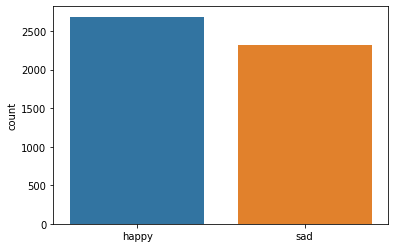

In [ ]:
sns.countplot(mood_unlabel2)

In [ ]:
probs = clf.predict_proba(unlabeled_df)
probs

array([[0.99412802, 0.00587198],
       [0.99883993, 0.00116007],
       [0.99867186, 0.00132814],
       ...,
       [0.99810891, 0.00189109],
       [0.93237976, 0.06762024],
       [0.64205854, 0.35794146]])

In [ ]:
song_emotion_score = probs[:,0]
print(song_emotion_score)
print(min(song_emotion_score))
print(max(song_emotion_score))

[0.99412802 0.99883993 0.99867186 ... 0.99810891 0.93237976 0.64205854]
2.523439347310535e-08
0.9997138956188393


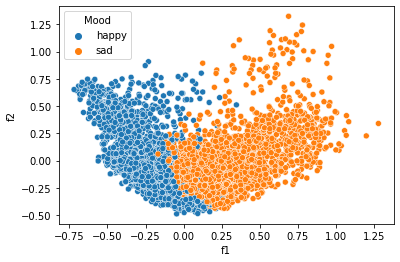

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(unlabeled_df)
temp = pd.DataFrame(reduced_data, columns=['f1','f2'])
temp['Mood'] = np.array(mood_unlabel2)

fig, ax = plt.subplots()

sns.scatterplot(x="f1", y="f2",  data=temp, hue = temp['Mood'])
plt.show()

In [ ]:
import csv

GRID SEARCH

#MLP GridSearch

MLP 96.05%

In [ ]:
clf1 = MLPClassifier(max_iter=1500, random_state=42)
params = {'solver': ['lbfgs', 'sgd', 'adam'],
          'activation': ['logistic', 'tanh', 'relu'],
          'learning_rate_init':[0.01,0.005,0.001],
          'alpha': [0.005,0.0001,0.001]}
gcv1 = GridSearchCV(clf1,params)
gcv1.fit(only_2_x, only_2_y)
print('best estimator',gcv1.best_estimator_)
print('best score',gcv1.best_score_)
d = gcv1.cv_results_
print(d)
with open('mlp_song_scores.csv','w') as f:
  for key in d.keys():
    f.write("%s,%s\n"%(key,d[key]))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

best estimator MLPClassifier(alpha=0.005, learning_rate_init=0.01, max_iter=1500,
              random_state=42)
best score 0.9605
{'mean_fit_time': array([ 6.92880096,  3.35117574,  0.62138743,  6.8086307 ,  4.2120574 ,
        0.97465215,  7.20046177, 10.27809663,  2.76439881,  3.72423005,
        3.48895321,  0.6835001 ,  3.78010402,  4.64726477,  0.9925354 ,
        3.77337418, 10.4588954 ,  2.65341692,  5.72555227,  3.58068037,
        1.04221144,  6.29570675,  4.33708882,  1.01268559,  5.54295254,
       10.309198  ,  2.62591124,  9.73169732,  1.9549994 ,  0.5268446 ,
        9.36541862,  2.25696783,  0.56171446,  9.78165822,  3.74026632,
        1.62659578,  3.73835387,  1.95496864,  0.54316492,  3.63587561,
        2.258424  ,  0.56889224,  3.68005452,  3.75046229,  1.65564189,
        4.71834636,  1.96439919,  0.52485752,  4.39369769,  2.3204668 ,
        0.56157446,  4.46869364,  3.73783503,  1.64860277,  9.38860321,
        1.23553982,  0.57280884,  9.23059411,  1.52885652, 

SVM 95.8%

#SVM GridSearch

In [ ]:
clf2 = SVC(probability=True, random_state=42)
params = {'kernel': ['rbf', 'poly', 'sigmoid'],
          'C':[0.1,0.5,0.01],
          'gamma':['scale', 'auto'],
          'degree':[2,3,4]}
gcv2 = GridSearchCV(clf2,params)
gcv2.fit(only_2_x, only_2_y)
print('best estimator',gcv2.best_estimator_)
print('best score',gcv2.best_score_)
d = gcv2.cv_results_
print(d)
with open('svc_song_scores.csv','w') as f:
  for key in d.keys():
    f.write("%s,%s\n"%(key,d[key]))

best estimator SVC(C=0.5, degree=2, probability=True, random_state=42)
best score 0.958
{'mean_fit_time': array([0.14994659, 0.05432892, 0.50462947, 0.26168213, 0.22710466,
       0.34617658, 0.14666862, 0.04832354, 0.50731444, 0.25928802,
       0.25261617, 0.34886017, 0.14701629, 0.05973115, 0.49517956,
       0.26069074, 0.26486201, 0.34023476, 0.0965004 , 0.04754405,
       0.36156049, 0.14991498, 0.13182249, 0.19229736, 0.0947062 ,
       0.06045794, 0.36039791, 0.15012393, 0.18608565, 0.19179239,
       0.09327049, 0.07486534, 0.36484218, 0.1507225 , 0.26082501,
       0.19313598, 0.35221629, 0.0976625 , 0.57733035, 0.47580256,
       0.25865464, 0.48437104, 0.34615335, 0.07058644, 0.57347236,
       0.47144871, 0.25598731, 0.48621726, 0.34686923, 0.05564876,
       0.57587442, 0.47489119, 0.26188536, 0.49186397]), 'std_fit_time': array([0.00578605, 0.00305688, 0.00992693, 0.00610513, 0.0040406 ,
       0.00840728, 0.00335881, 0.00116574, 0.01128073, 0.00491949,
       0.00272343

#Models


##SVC

In [ ]:
from sklearn.svm import SVC

clf = SVC(C=0.5, degree=2, probability=True, random_state=42, kernel='rbf', gamma='auto').fit(X_train, y_train)

y_pred = clf.predict(X_test)

misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape
print("accuracy: ", acc*100, "%")

accuracy:  [94.75] %


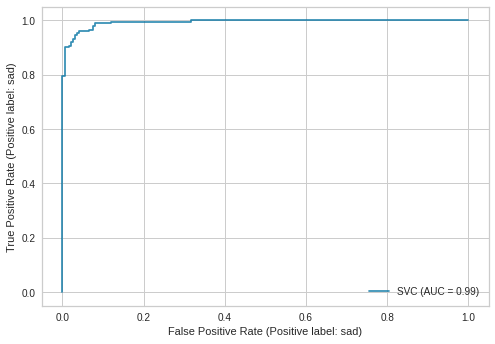

In [ ]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
# svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9635    0.9296    0.9463       199
         sad     0.9327    0.9652    0.9487       201

    accuracy                         0.9475       400
   macro avg     0.9481    0.9474    0.9475       400
weighted avg     0.9480    0.9475    0.9475       400



##BEST MODEL MLP 96.05%

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=1500, alpha=0.005, learning_rate_init=0.01, random_state=42, solver='lbfgs').fit(X_train, y_train)
y_pred = clf.predict(X_test)
misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape
print("accuracy: ", acc*100, "%")

accuracy:  [95.25] %


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=1500, alpha=0.005, learning_rate_init=0.01, random_state=42, solver='sgd').fit(X_train, y_train)
y_pred = clf.predict(X_test)
misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape
print("accuracy: ", acc*100, "%")

accuracy:  [95.25] %


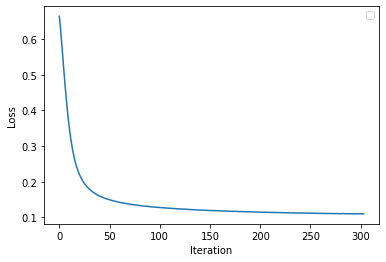

In [ ]:
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.plot(clf.loss_curve_)

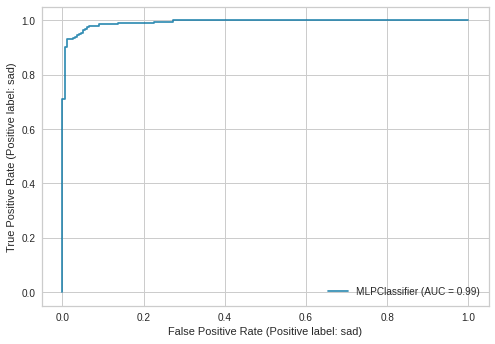

In [ ]:
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)
# svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       happy     0.9787    0.9246    0.9509       199
         sad     0.9292    0.9801    0.9540       201

    accuracy                         0.9525       400
   macro avg     0.9540    0.9524    0.9524       400
weighted avg     0.9539    0.9525    0.9525       400



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=1500, alpha=0.005, learning_rate_init=0.01, random_state=42, solver='adam').fit(X_train, y_train)
y_pred = clf.predict(X_test)
misclasified = np.sum(y_pred != y_test)
acc =  1 - misclasified/y_pred.shape
print("accuracy: ", acc*100, "%")

accuracy:  [94.75] %


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=1500, alpha=0.005, learning_rate_init=0.01, random_state=42, solver='sgd').fit(only_2_x, only_2_y)
y_pred = clf.predict(only_2_x)
misclasified = np.sum(y_pred != only_2_y)
acc =  1 - misclasified/y_pred.shape
print("accuracy: ", acc*100, "%")

mood_score = clf.predict(unlabeled_df)

accuracy:  [95.65] %


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


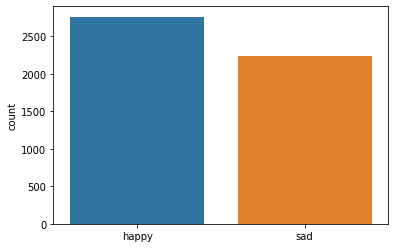

In [ ]:
sns.countplot(mood_score)

In [ ]:
probs = clf.predict_proba(unlabeled_df)
song_emotion_score = np.array(probs[:,0])

In [ ]:
unlabeled_df['Genre'] = genre
unlabeled_df['Happy_score'] = song_emotion_score

In [ ]:
unlabeled_df

,Acousticness,Dancebility,Energy,Instrumentalness,Liveliness,Loudness,Speechiness,Tempo,Valence,Genre,Happy_score
0,0.007598,0.376203,0.987211,0.049340,0.156269,0.755835,0.131606,0.744334,0.301505,happy,0.994743
1,0.201423,0.534699,0.995737,0.011574,0.706484,0.925764,0.225850,0.318419,0.456149,happy,0.957881
2,0.008056,0.439601,0.977619,0.001736,0.379219,0.908278,0.104679,0.744646,0.426051,happy,0.993036
3,0.032145,0.491679,0.889161,0.007340,0.013807,0.824785,0.094581,0.715576,0.330566,happy,0.925058
4,0.012512,0.560738,0.990408,0.000004,0.352628,0.876924,0.136093,0.744493,0.520498,happy,0.985186
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000562,0.354693,0.978685,0.000270,0.055021,0.822870,0.122630,0.727348,0.491437,death-metal,0.988258
4996,0.000259,0.184875,0.981882,0.249746,0.091839,0.728772,0.179850,0.660285,0.025636,death-metal,0.999215
4997,0.000024,0.422620,0.974422,0.000040,0.424218,0.843442,0.113654,0.659513,0.324338,death-metal,0.993258
4998,0.001464,0.414695,0.954172,0.794924,0.158315,0.791303,0.030405,0.324308,0.110535,death-metal,0.999655


In [ ]:
dataset['Happy_score'] = song_emotion_score
dataset

,Accousticness,Album Name,Artist Name,Dancebility,Energy,Genre,Instrumentalness,Key,Liveliness,Loudness,...,Release Date,Sno,Song Duration,Song ID,Song Name,Speechiness,Tempo,Time Signature,Valence,Happy_score
9000,0.007470,Old Skool Masters - S3RL,S3RL,0.429,0.988,happy,0.048600,4,0.1690,-5.241,...,2007,9000,363428,3G1SVODcssMmS5YM5G3tun,Pretty Rave Girl,0.1400,175.019,4,0.3120,0.994743
9001,0.198000,Wanna Play?,The Prophet,0.569,0.996,happy,0.011400,5,0.7070,-0.450,...,22-05-2019,9001,201451,6iBL6TOzsO75Yz0cG1MO0o,Wanna Play?,0.2240,100.020,3,0.4610,0.957881
9002,0.007920,Mtc - Single,S3RL,0.485,0.979,happy,0.001710,2,0.3870,-0.943,...,15-02-2012,9002,260530,56nLHj9HJr3xpbLarnr0l4,Mtc,0.1160,175.074,4,0.4320,0.993036
9003,0.031600,Us Against The World,Darren Styles,0.531,0.896,happy,0.007230,1,0.0297,-3.297,...,03-04-2017,9003,271058,0L0DM33NAe6PjQ1BB4cEjJ,Us Against The World,0.1070,169.955,4,0.3400,0.925058
9004,0.012300,Pika Girl - Single,S3RL,0.592,0.991,happy,0.000004,1,0.3610,-1.827,...,11-08-2011,9004,225542,5xnLp83K91G0Qi9zPtOSnG,Pika Girl,0.1440,175.047,4,0.5230,0.985186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000554,Lotus,Within Destruction,0.410,0.980,death-metal,0.000266,1,0.0700,-3.351,...,30-09-2022,5995,190565,6ng1HH1oZjSK8BiwSQ7qHt,Neo-Yakuza,0.1320,172.028,4,0.4950,0.988258
5996,0.000256,Netherheaven,Revocation,0.260,0.983,death-metal,0.246000,10,0.1060,-6.004,...,09-09-2022,5996,325653,1NWjOUZHi4TMFGMGQwEUZ9,Galleries of Morbid Artistry,0.1830,160.219,3,0.0462,0.999215
5997,0.000024,Matriarch,Veil Of Maya,0.470,0.976,death-metal,0.000039,8,0.4310,-2.771,...,11-05-2015,5997,227444,7oRKSK0gLpyyd05NEhMXDn,Aeris,0.1240,160.083,3,0.3340,0.993258
5998,0.001440,Edge of the Earth,Sylosis,0.463,0.957,death-metal,0.783000,9,0.1710,-4.241,...,11-03-2011,5998,236120,5ir8E3XZ2yelK2Z6VzZBuD,Where the Sky Ends,0.0498,101.057,3,0.1280,0.999655


In [ ]:
dataset.to_csv('drive/MyDrive/ML_Project_Sem5/'+"songs_with_emotion_score.csv", index=False, encoding='utf-8-sig')